<a href="https://colab.research.google.com/github/LucasNatalePires/kaggle_titanic/blob/main/titanic_version3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**As I have already treated the data better and it was still not enough, I will use RESOURCE ENGINEERING, basically extracting and transforming data, seeking to find the best variables to improve accuracy**

**What's Resource Engineering ?
It covers the extraction and transformation of base variables into raw data, to be used for training and data prediction.**

**As I already explained and repeated the same process in the first two files, I will use a dataset already cleaned
and updated exported on the last code.
[version 1](https://github.com/LucasNatalePires/kaggle_titanic/blob/main/titanic_version1.ipynb) or
[version 2](https://github.com/LucasNatalePires/kaggle_titanic/blob/main/titanic_version2.ipynb)**

In [266]:
#Import
import pandas as pd

In [267]:
#Getting to know our dataset
test = pd.read_csv('/content/test_clean_upd.csv')
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FemaleCheck,Embarked_C,Embarked_Q,Embarked_S,Survived
0,892,3,34.5,0,0,7.8292,0,0,1,0,0
1,893,3,47.0,1,0,7.0000,1,0,0,1,0
2,894,2,62.0,0,0,9.6875,0,0,1,0,0
3,895,3,27.0,0,0,8.6625,0,0,0,1,0
4,896,3,22.0,1,1,12.2875,1,0,0,1,1


In [268]:
#Getting to know our dataset
train = pd.read_csv('/content/train_clean_upd.csv')
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FemaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,1


**With the dataset already treated, I will separate it into train and test so I can work with them**

In [269]:
#Import
from sklearn.model_selection import train_test_split

In [270]:
#Separating the training base into X and y
X = train.drop(['PassengerId','Survived'], axis = 1)
y = train.Survived

In [271]:
#Separate train and validation
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.33, random_state=42)

**Although the logistic regression was more efficient, let's check the 3 models, because with the new changes there may be some changes and also, because I will create and transform some variables, and as not always, the attempt will be the best option, I will create a comparative table to understand which was better**

**I'll compare these three models:**

[Decision Tree](https://scikit-learn.org/stable/modules/tree.html#classification)

[KNC](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

[Logistic Regression](https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

In [272]:
#Import Tree Decision
from sklearn import tree

In [273]:
#Creating the classifier
clf_dt = tree.DecisionTreeClassifier(random_state = 42)

In [274]:
#Fit with datas
clf_dt = clf_dt.fit(X_train, y_train)

In [275]:
#Making the prediction
y_pred_dt = clf_dt.predict(X_validation)

In [276]:
#Import KNC
from sklearn.neighbors import KNeighborsClassifier

In [277]:
#Creating the classifier
clf_knc = KNeighborsClassifier(n_neighbors=3)

In [278]:
#Fit with datas
clf_knc = clf_knc.fit(X_train, y_train)

In [279]:
#Making the prediction
y_pred_knc = clf_knc.predict(X_validation)

In [280]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression

In [281]:
#Creating the classifier
clf_lr = LogisticRegression(random_state = 42, max_iter=1000)

In [282]:
#Fit with datas
clf_lr = clf_lr.fit(X_train, y_train)

In [283]:
#Making the prediction
y_pred_lr = clf_lr.predict(X_validation)

 # [Accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [284]:
#Import
from sklearn.metrics import accuracy_score

In [285]:
#Tree accuracy
acc_dt = accuracy_score(y_validation, y_pred_dt)

In [286]:
#KNC acuracy
acc_knc = accuracy_score(y_validation, y_pred_knc)

In [287]:
#Logistic regression accuracy
acc_lr = accuracy_score(y_validation, y_pred_lr)

**This dataframe was only created so that I can compare and illustrate when the transformation of variables improved or worsened my accuracy**

In [288]:
accu_df = pd.DataFrame({
    'Models' : ['Tree', 'KNC', 'Log Regres'],
    'Initial': [acc_dt , acc_knc, acc_lr]
})
accu_df

,Models,Initial
0,Tree,0.745763
1,KNC,0.715254
2,Log Regres,0.816949


**Now I'll start to use the resources engeneering. Visualizing all the columns, in a graph, using the [matplotlib library](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots)**

In [289]:
#Import
import matplotlib.pyplot as plt

In [290]:
#Check the train columns
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'FemaleCheck', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

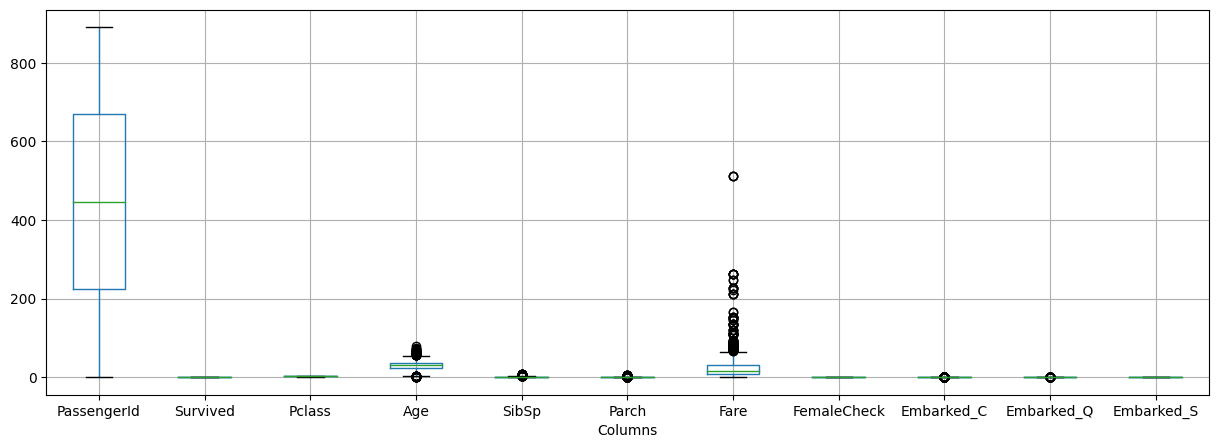

In [291]:
#Create the boxplot
train.boxplot(column=['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
'FemaleCheck', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],ax=None,fontsize = 10,figsize=(15,5))
plt.xlabel('Columns')
plt.show()

**I can see it in general and notice a large discrepancy between the variables. In the 'fare' column and 'Age' column, that's why I need to treat this column, making it more standard and normalized. I will use the [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) to treat this column**

In [292]:
#Import
from sklearn.preprocessing import RobustScaler

In [293]:
#Creating the scaler
transformer = RobustScaler().fit(train[['Age','Fare']])

In [294]:
#Transforming the datas
train[['Age', 'Fare']] = transformer.transform(train[['Age','Fare']])

In [295]:
#Checking the new values
train[['Age', 'Fare']]

,Age,Fare
0,-0.592240,-0.312011
1,0.638529,2.461242
2,-0.284548,-0.282777
3,0.407760,1.673732
4,0.407760,-0.277363
...,...,...
886,-0.207624,-0.062981
887,-0.823009,0.673281
888,0.000000,0.389604
889,-0.284548,0.673281


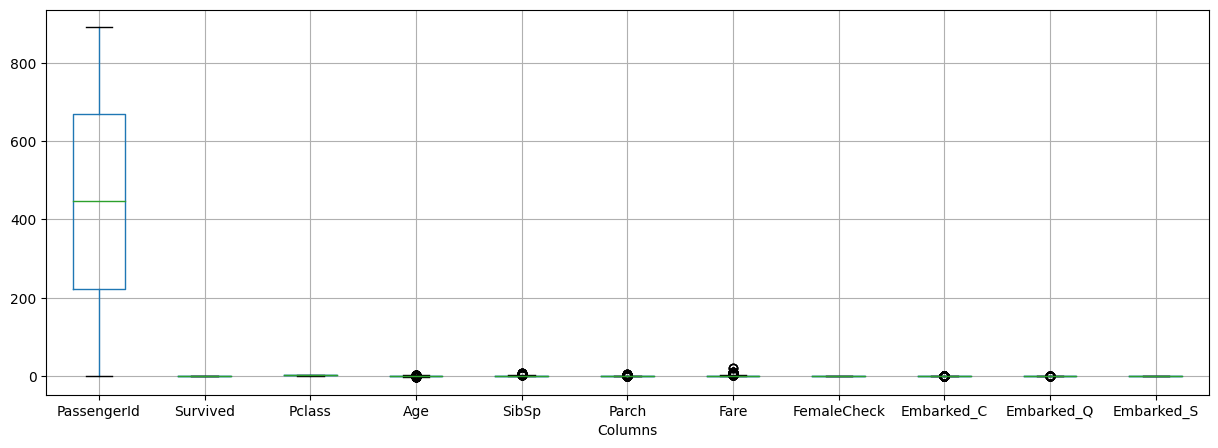

In [296]:
#Check the graph with thwe new values
train.boxplot(column=['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
'FemaleCheck', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],ax=None,fontsize = 10,figsize=(15,5))
plt.xlabel('Columns')
plt.show()

**Everything I do in the training column, I need to do in the test column, so I will repeat the same process**

In [297]:
#Apply these change to test
transformer = RobustScaler().fit(test[['Age', 'Fare']])

In [298]:
#Creating the scaler
test[['Age', 'Fare']] = transformer.transform(test[['Age', 'Fare']])

In [299]:
#Checking the values transformers
test[['Age', 'Fare']]

,Age,Fare
0,0.331562,-0.280670
1,1.311954,-0.315800
2,2.488424,-0.201943
3,-0.256674,-0.245367
4,-0.648831,-0.091793
...,...,...
413,0.000000,-0.271316
414,0.684503,4.001229
415,0.645287,-0.305208
416,0.000000,-0.271316


# The process I carried out below has already been done countless times and will only be done for educational purposes, to understand how much dealing with the scale improved or worsened accuracy

In [300]:
#Import
from sklearn.model_selection import train_test_split

#Separating the training base into X and y
X = train.drop(['PassengerId','Survived'], axis = 1)
y = train.Survived

#Separate train and validation
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.33, random_state=42)

In [301]:
#Import Tree Decision
from sklearn import tree

#Creating the classifier
clf_dt = tree.DecisionTreeClassifier(random_state = 42)

#Fit with datas
clf_dt = clf_dt.fit(X_train, y_train)

#Making the prediction
y_pred_dt = clf_dt.predict(X_validation)

In [302]:
#Import KNC
from sklearn.neighbors import KNeighborsClassifier

#Creating the classifier
clf_knc = KNeighborsClassifier(n_neighbors=3)

#Fit with datas
clf_knc = clf_knc.fit(X_train, y_train)

#Making the prediction
y_pred_knc = clf_knc.predict(X_validation)

In [303]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression

#Creating the classifier
clf_lr = LogisticRegression(random_state = 42, max_iter=1000)

#Fit with datas
clf_lr = clf_lr.fit(X_train, y_train)

#Making the prediction
y_pred_lr = clf_lr.predict(X_validation)

In [304]:
#Import
from sklearn.metrics import accuracy_score

#Tree accuracy
acc_dt = accuracy_score(y_validation, y_pred_dt)

#KNC acuracy
acc_knc = accuracy_score(y_validation, y_pred_knc)

#Logistic regression accuracy
acc_lr = accuracy_score(y_validation, y_pred_lr)

In [305]:
accu_df['scale'] = [acc_dt, acc_knc, acc_lr]

In [306]:
accu_df

,Models,Initial,scale
0,Tree,0.745763,0.745763
1,KNC,0.715254,0.800000
2,Log Regres,0.816949,0.816949


# As it basically uses the similarity between the K (in the example above, K = 3) closest points in the dataset to estimate values, it is intuitive that any value that deviates greatly from the average interferes with precision, so when we place these values on the same scale, using [Robust Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html), there was this considerable improvement

**The result was not satisfactory, so I will work on the survivor and family relationship(SibSp and Parch).**

In [307]:
#Create a dataFrame with some informations to understand this column
SibSp_df = train.groupby('SibSp')['Survived'].agg(['count','sum','mean']).reset_index()
SibSp_df.columns = ['SibSp','total','survival','survival_rate']
SibSp_df

,SibSp,total,survival,survival_rate
0,0,608,210,0.345395
1,1,209,112,0.535885
2,2,28,13,0.464286
3,3,16,4,0.250000
4,4,18,3,0.166667
5,5,5,0,0.000000
6,8,7,0,0.000000


In [308]:
#Create a dataFrame with some informations to understand this column
Parch_df = train.groupby('Parch')['Survived'].agg(['count','sum','mean']).reset_index()
Parch_df.columns = ['Parch','total','survival','survival_rate']
Parch_df

,Parch,total,survival,survival_rate
0,0,678,233,0.343658
1,1,118,65,0.550847
2,2,80,40,0.500000
3,3,5,3,0.600000
4,4,4,0,0.000000
5,5,5,1,0.200000
6,6,1,0,0.000000


Text(0.5, 1.0, 'Survivors by number of parents/children')

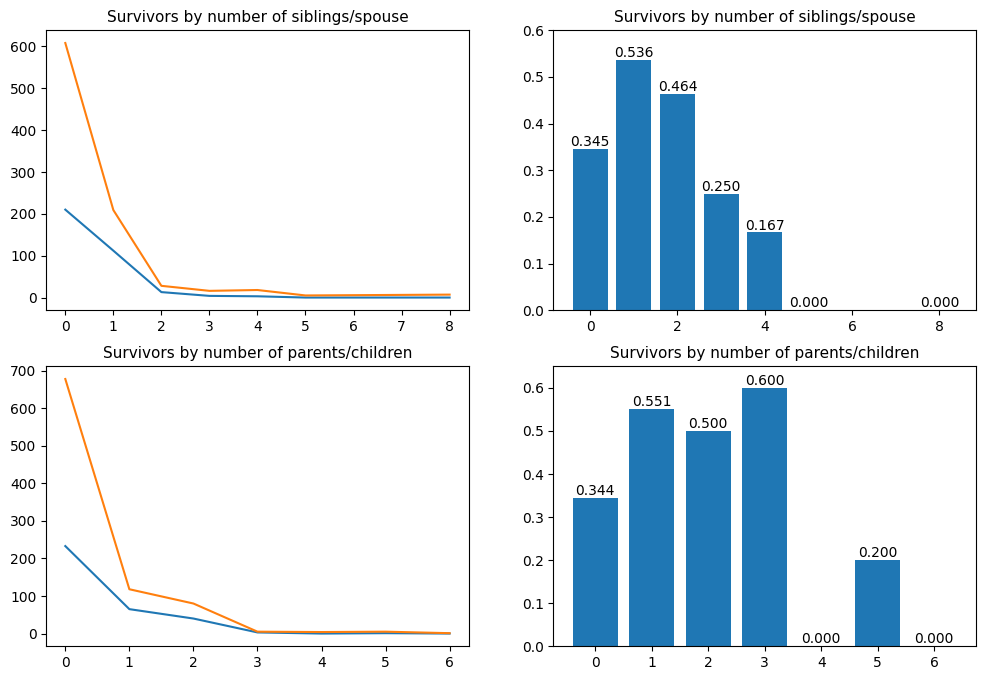

In [309]:
#Checking this data in a graphic
fig, ax = plt.subplots(nrows =2, ncols = 2, figsize = (12,8))

ax[0,0].plot(SibSp_df.SibSp, SibSp_df.survival)
ax[0,0].plot(SibSp_df.SibSp, SibSp_df.total)
ax[0,0].set_title('Survivors by number of siblings/spouse', fontsize = 11)

label_sib = ax[0,1].bar(SibSp_df.SibSp, SibSp_df.survival_rate)
ax[0,1].bar_label(label_sib, fmt = '%.3f')
ax[0,1].set(ylim = (0,0.6))
ax[0,1].set_title('Survivors by number of siblings/spouse', fontsize = 11)

ax[1,0].plot(Parch_df.Parch, Parch_df.survival)
ax[1,0].plot(Parch_df.Parch, Parch_df.total)
ax[1,0].set_title('Survivors by number of parents/children', fontsize = 11)

label_par = ax[1,1].bar(Parch_df.Parch, Parch_df.survival_rate)
ax[1,1].bar_label(label_par, fmt = '%.3f')
ax[1,1].set(ylim = (0,0.65))
ax[1,1].set_title('Survivors by number of parents/children', fontsize = 11)


**With the graphs, I can see a pattern in which apparently traveling alone there is less chance of survival. There is also a higher survival rate between 1-3 family members, so I will explore this theory further**

In [310]:
#Create a function to check if the person is alone
def check_alone(x,y):
    if x == 0 and y == 0:
        return 1
    else:
        return 0

In [311]:
#Create the column and apply the function
train['Alone'] = train.apply(lambda x:check_alone(x.SibSp, x.Parch), axis=1)

In [312]:
#Check these variables with more details
train.groupby('Alone')[['SibSp', 'Parch']].mean()

,SibSp,Parch
Alone,,
0,1.316384,0.960452
1,0.000000,0.000000


In [313]:
#Doing the same thing on test
test['Alone'] = test.apply(lambda x:check_alone(x.SibSp, x.Parch), axis=1)

In [314]:
test.groupby('Alone')[['SibSp', 'Parch']].mean()

,SibSp,Parch
Alone,,
0,1.133333,0.993939
1,0.000000,0.000000


**I saw that perhaps the number of relatives on board could be a criterion, and since I created this column, I will create a new one that will add up the total number of family members, so I can check the accuracy again and see if there has been an improvement**

In [315]:
#Creating the new column
train['Relatives'] = train['SibSp'] + train['Parch']

In [316]:
#Doing the same thing on test
test['Relatives'] = test['SibSp'] + test['Parch']

In [317]:
#Creating a DataFrame to summarize the new column
Relatives_df = train.groupby('Relatives')['Survived'].agg(['count','sum','mean']).reset_index()
Relatives_df.columns = ['Relatives','total','survival','survival_rate']
Relatives_df

,Relatives,total,survival,survival_rate
0,0,537,163,0.303538
1,1,161,89,0.552795
2,2,102,59,0.578431
3,3,29,21,0.724138
4,4,15,3,0.200000
5,5,22,3,0.136364
6,6,12,4,0.333333
7,7,6,0,0.000000
8,10,7,0,0.000000


Text(0.5, 1.0, 'Survivors by number of relatives')

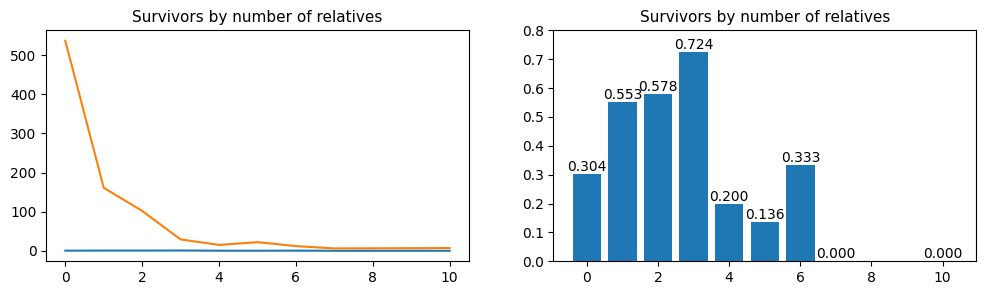

In [318]:
#Now in the graphic
fig, ax = plt.subplots(ncols = 2, figsize = (12,3))

ax[0].plot(Relatives_df.Relatives,Relatives_df.survival_rate)
ax[0].plot(Relatives_df.Relatives,Relatives_df.total)
ax[0].set_title('Survivors by number of relatives', fontsize = 11)

label = ax[1].bar(Relatives_df.Relatives,Relatives_df.survival_rate)
ax[1].bar_label(label, fmt = '%.3f')
ax[1].set(ylim = (0,0.8))
ax[1].set_title('Survivors by number of relatives', fontsize = 11)


**With these changes, I will test the accuracy again and compare with the previous ones.**
# The same process done several times during the project:
    -Separate the test base
    -Import the models(Decision Tree, KNC, Logistic Regression)
    -Get the accuracy
    -Check with the confusion matrix
    -Add the accuracy to the dataFrame for comparison purposes

In [319]:
#Import train_test_split
from sklearn.model_selection import train_test_split

#Separating the training base into X and y
X = train.drop(['PassengerId','Survived'], axis = 1)
y = train.Survived

#Separate train and validation
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.33, random_state=42)

In [320]:
#Import
from sklearn import tree
#Creating the classifier
clf_dt = tree.DecisionTreeClassifier(random_state = 42)
#Fit with datas
clf_dt = clf_dt.fit(X_train, y_train)
#Making the prediction
y_pred_dt = clf_dt.predict(X_validation)

In [321]:
#Import
from sklearn.neighbors import KNeighborsClassifier
#Creating the classifier
clf_knc = KNeighborsClassifier(n_neighbors=3)
#Fit with datas
clf_knc = clf_knc.fit(X_train, y_train)
#Making the prediction
y_pred_knc = clf_knc.predict(X_validation)

In [322]:
#Import
from sklearn.linear_model import LogisticRegression
#Creating the classifier
clf_lr = LogisticRegression(random_state = 42, max_iter= 1000)
#Fit with datas
clf_lr = clf_lr.fit(X_train, y_train)
#Making the predction
y_pred_lr = clf_lr.predict(X_validation)

In [323]:
#Import confusion_matrix
from sklearn.metrics import confusion_matrix

In [324]:
#Decision Tree confusion_matrix
confusion_matrix(y_validation, y_pred_dt)

array([[137,  38],
       [ 39,  81]])

In [325]:
#KNeighborsClassifier confusion_matrix
confusion_matrix(y_validation, y_pred_knc)

array([[153,  22],
       [ 41,  79]])

In [326]:
#Logistic Regression confusion_matrix
confusion_matrix(y_validation, y_pred_lr)

array([[151,  24],
       [ 33,  87]])

In [327]:
#Import Accuracy
from sklearn.metrics import accuracy_score

#Decision Tree Accuracy
acc_dt = accuracy_score(y_validation, y_pred_dt)
#KNeighborsClassifier accuracy
acc_knc = accuracy_score(y_validation, y_pred_knc)
#Logistic Regression Accuracy
acc_lr = accuracy_score(y_validation, y_pred_lr)

In [328]:
#The comparation to check if was any improvement
accu_df['Parents'] = [acc_dt, acc_knc, acc_lr]
accu_df

,Models,Initial,scale,Parents
0,Tree,0.745763,0.745763,0.738983
1,KNC,0.715254,0.800000,0.786441
2,Log Regres,0.816949,0.816949,0.806780


**Despite all the effort, accuracy decreases in all models, so I will look for the best variables to obtain the objective**

In [329]:
#Checking the correlation between the datas, but it doesn't look friendly
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FemaleCheck,Embarked_C,Embarked_Q,Embarked_S,Alone,Relatives
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,-0.042939,-0.001205,-0.033606,0.022204,0.057462,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,0.543351,0.168240,0.003650,-0.149683,-0.203367,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.131900,-0.243292,0.221009,0.074053,0.135207,0.065997
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.084153,0.032024,-0.013855,-0.019336,0.179775,-0.248512
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,0.114631,-0.059528,-0.026354,0.068734,-0.584471,0.890712
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,0.245489,-0.011069,-0.081228,0.060814,-0.583398,0.783111
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.182333,0.269335,-0.117216,-0.162184,-0.271832,0.217138
FemaleCheck,-0.042939,0.543351,-0.131900,-0.084153,0.114631,0.245489,0.182333,1.000000,0.082853,0.074115,-0.119224,-0.303646,0.200988
Embarked_C,-0.001205,0.168240,-0.243292,0.032024,-0.059528,-0.011069,0.269335,0.082853,1.000000,-0.148258,-0.782742,-0.095298,-0.046215
Embarked_Q,-0.033606,0.003650,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,0.074115,-0.148258,1.000000,-0.499421,0.086464,-0.058592


**I know, it doesn't look very friendly,so I will generate a heatmap, using the [Seaborn](https://seaborn.pydata.org/installing.html) so and maybe can understand clearly the correlacions**

In [330]:
#Import seaborn
import seaborn as sns

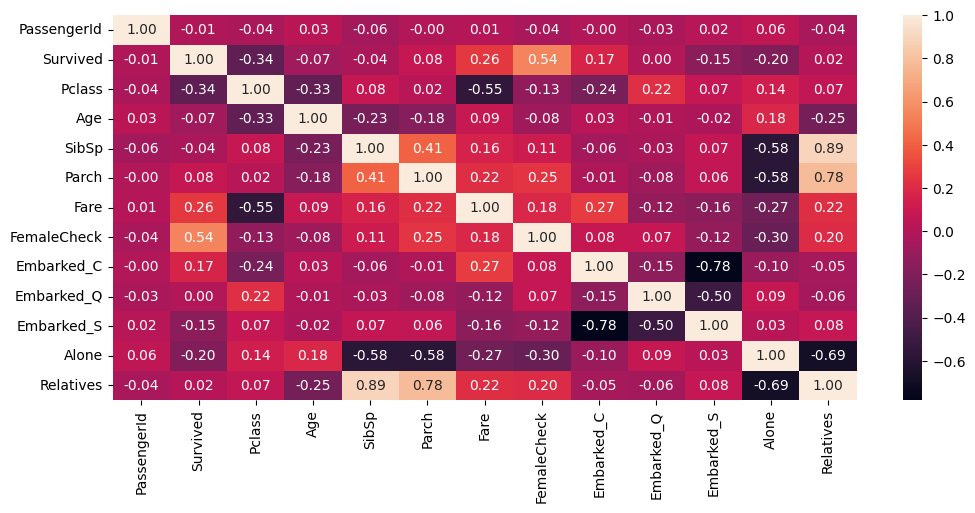

In [331]:
# Creating the heapmap
fig, ax = plt.subplots(figsize = (12,5))
sns.heatmap(train.corr(), annot=True, fmt=".2f")
plt.show()

**Now it's look better, but is not necessary the variables "Embarked_C, Embarked_Q and Embarked_S", I can change this columns and create just one. In the second version, where I treated this column so that it became a number and did not interfere with the application of the algorithm, I used [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), as there was no ordinality in the situation. However, now that we are exploring the data better, there is an order, after all, the passengers boarded first at some port and so on until the last.**

**Doing some [research](https://en.wikivoyage.org/wiki/RMS_Titanic#:~:text=Her%20voyage%20was%20from%20Southampton,and%20sank%20two%20hours%20later.) it is possible to notice that the order was respectively:**

    -Southampton
    -Cherbourg
    -Queenstown
    
**So, now there is an order, so I will use [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) to treat that column. It will be necessary to use our first base, considering that it already excludes the Embarked column. Creating a new column in this table does not help, as it will be necessary to fit the datas with the [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)**

**You can download these dataset here: [train](https://github.com/LucasNatalePires/kaggle_titanic/blob/main/train_clean.csv) and [test](https://github.com/LucasNatalePires/kaggle_titanic/blob/main/test_clean.csv)**

In [332]:
#Import the old dataset
train2 = pd.read_csv("/content/train_clean.csv")
test2 = pd.read_csv("/content/test_clean.csv")

In [333]:
#Import
from sklearn.preprocessing import OrdinalEncoder

In [334]:
#Creating the encoder
ports = ['S','C','Q']
enc = OrdinalEncoder(categories=[ports],dtype = 'int32')

In [335]:
#Fit with datas
enc = enc.fit(train2[['Embarked']])

In [336]:
# Add these datas on the column train
train['Embarked'] = enc.transform(train2[['Embarked']])

In [337]:
#The same job with test, Fit with datas
enc = enc.fit(test2[['Embarked']])

In [338]:
# Add these datas on the column test
test['Embarked'] = enc.transform(test2[['Embarked']])

In [339]:
#Now I can delete that columns, and, I'll apply in both datasets, because they need be the same
train = train.drop(['Embarked_C','Embarked_Q','Embarked_S'], axis=1)
test = test.drop(['Embarked_C','Embarked_Q','Embarked_S'], axis=1)

In [340]:
#Check the dataset
train.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FemaleCheck,Alone,Relatives,Embarked
0,1,0,3,-0.592240,1,0,-0.312011,0,0,1,0
1,2,1,1,0.638529,1,0,2.461242,1,0,1,1
2,3,1,3,-0.284548,0,0,-0.282777,1,1,0,0


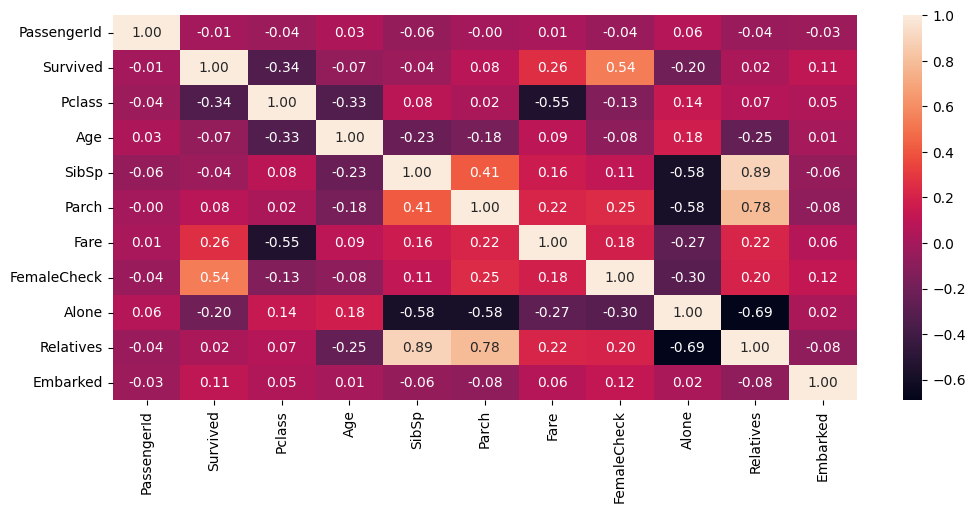

In [341]:
#Creating the heatmap
fig, ax = plt.subplots(figsize = (12,5))
sns.heatmap(train.corr(), annot= True, fmt='.2f')
plt.show()

**Analyzing the heat map again, I see that the correlation in the 'SibSp' and 'Parch' columns is very low, in addition, I have already created the column that checks whether you are alone or not, and with how many economic family members. But, before deleting, there is another thing to check with [Decision Tree](https://scikit-learn.org/stable/modules/tree.html#classification) and [Logistic Regression](https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) to check the importance of each column**

In [342]:
#Separating the training base into X and y
X = train.drop(['PassengerId','Survived'], axis = 1)
y = train.Survived

In [343]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression

#Creating the classifier
clf_lr = LogisticRegression(random_state = 42, max_iter=1000).fit(X,y)

#Checking the importance
clf_lr.coef_[0]

array([-1.03311157, -0.49639848, -0.26819859,  0.01692318,  0.04399633,
        2.53464123, -0.73236301, -0.25127541,  0.23864048])

In [344]:
#The same job with Tree

#Import
from sklearn import tree

#Creating the classifier
clf_dt = tree.DecisionTreeClassifier(random_state = 42).fit(X,y)

In [345]:
clf_dt.feature_importances_

array([0.11070701, 0.23503354, 0.01553644, 0.01869814, 0.2306302 ,
       0.30933519, 0.00418869, 0.05883334, 0.01703745])

**I know, is hard to understand these numbers. Let's transform it in a dataFrame to be a friendly view**

In [346]:
importance = pd.DataFrame({
    'columns': X.columns,
    'reg_log':clf_lr.coef_[0],
    'dec_tree':clf_dt.feature_importances_
    })

importance

,columns,reg_log,dec_tree
0,Pclass,-1.033112,0.110707
1,Age,-0.496398,0.235034
2,SibSp,-0.268199,0.015536
3,Parch,0.016923,0.018698
4,Fare,0.043996,0.230630
5,FemaleCheck,2.534641,0.309335
6,Alone,-0.732363,0.004189
7,Relatives,-0.251275,0.058833
8,Embarked,0.238640,0.017037


**The suspicion is confirmed... Analyzing the numbers for 'Alone' and 'Relatives', I notice that the columns 'SibSp' and 'Parch' are irrelevant, and to avoid a lot of unnecessary data, I will delete them**

In [347]:
#Deleting 'SibSp' and 'Parch'
train = train.drop(['SibSp','Parch'],axis=1)
test = test.drop(['SibSp','Parch'],axis=1)

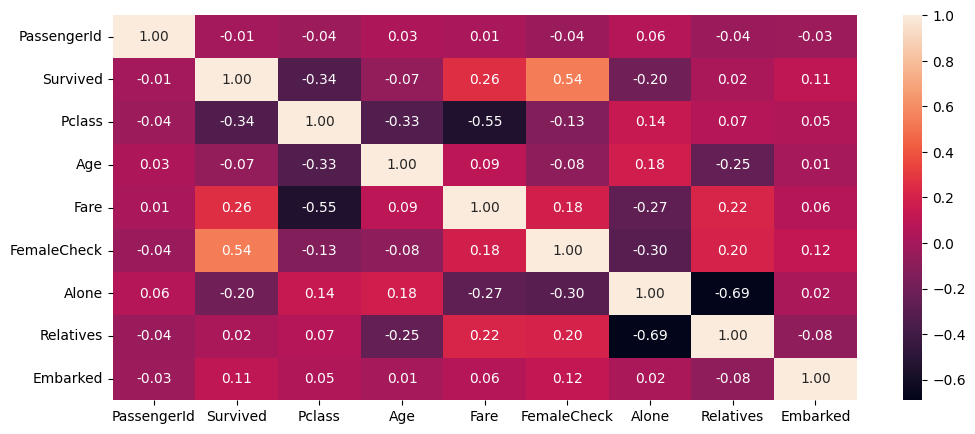

In [348]:
#Creating the heatmap
fig, ax = plt.subplots(figsize =(12,5))
sns.heatmap(train.corr(),annot=True, fmt='.2f')
plt.show()

**Now the heatmap is much more user-friendly, a little cleaner. We just need to better understand the relationship between 'Fare' x 'P class'**

In [349]:
#Checking the survival rate between the class
train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

**Apparently, people in the first class have a better chance of survival, so I'm going to delve deeper into this idea. Possibly those who were in first class had better service, perhaps a better location and more attention at the time of the accident**

In [350]:
#Checking more informations about those variables
train.groupby(['Pclass','Survived'])['Fare'].agg(['min','mean','max'])

min      mean        max
Pclass Survived                               
1      0        -0.626005  2.175430  10.764405
       1         0.496977  3.514735  21.562738
2      0        -0.626005  0.214734   2.557247
       1        -0.171255  0.329217   2.189115
3      0        -0.626005 -0.033991   2.386174
       1        -0.626005 -0.032885   1.820802

**As expected, those who paid more had a higher survival rate, and although this data is tempting, there is a problem. Despite the correlation and relevance of this information, in [version 1](https://github.com/LucasNatalePires/kaggle_titanic/blob/main/titanic_version1.ipynb), when I checked which values were null, of the 891 values, in the fare column There were only 241, so more than 77% of the values are null, obviously this column was treated, I put the average prices in the null columns, but still, it makes it impossible for us to explore this column to obtain a good accuracy**

**Time to check the accuracy with these new treatments and compare in the dataFrame created exactly to understand how much the treatment provided helped or not, and to do it, it is necessary to do the same process that has already been done countless times....**
    
    -Separate the test base
    -Import the models(Decision Tree, KNC, Logistic Regression)
    -Get the accuracy
    -Check with the confusion matrix
    -Add the accuracy to the dataFrame for comparison purposes

In [351]:
#Import
from sklearn.model_selection import train_test_split
#Separating the train base into X and Y
X = train.drop(['PassengerId','Survived'], axis = 1)
y = train.Survived
#Separating in train and validation
X_train, X_validation, y_train, y_validation = train_test_split(
X, y, test_size=0.33, random_state=42)

In [352]:
#Import Tree Decision
from sklearn import tree
#Creating the classifier
clf_dt = tree.DecisionTreeClassifier(random_state = 42)
#Fit with datas
clf_dt = clf_dt.fit(X_train, y_train)
#Making the prediction
y_pred_dt = clf_dt.predict(X_validation)

In [353]:
#Import
from sklearn.neighbors import KNeighborsClassifier
#Creating the classifier
clf_knc = KNeighborsClassifier(n_neighbors=3)
#Fit with datas
clf_knc = clf_knc.fit(X_train, y_train)
#Making the prediction
y_pred_knc = clf_knc.predict(X_validation)

In [354]:
#Import
from sklearn.linear_model import LogisticRegression
#Creating the classifier
clf_lr = LogisticRegression(random_state = 42, max_iter= 1000)
#Fit with datas
clf_lr = clf_lr.fit(X_train, y_train)
#Making the predction
y_pred_lr = clf_lr.predict(X_validation)

In [355]:
#Import Accuracy
from sklearn.metrics import accuracy_score

In [356]:
#Decision Tree Accuracy
acc_dt = accuracy_score(y_validation, y_pred_dt)

In [357]:
# KNeighborsClassifier accuracy
acc_knc = accuracy_score(y_validation, y_pred_knc)

In [358]:
# Logistic Regression accuracy
acc_lr = accuracy_score(y_validation, y_pred_lr)

In [359]:
#Import
from sklearn.metrics import confusion_matrix

In [360]:
#Decision Tree confusion_matrix
confusion_matrix(y_validation, y_pred_dt)

array([[141,  34],
       [ 35,  85]])

In [361]:
#KNeighborsClassifier confusion_matrix
confusion_matrix(y_validation, y_pred_knc)

array([[149,  26],
       [ 37,  83]])

In [362]:
#Logistic Regression confusion_matrix
confusion_matrix(y_validation, y_pred_lr)

array([[154,  21],
       [ 35,  85]])

In [363]:
# Add these information to dataFrame
accu_df['NewColumn'] = [acc_dt, acc_knc, acc_lr]
accu_df

,Models,Initial,scale,Parents,NewColumn
0,Tree,0.745763,0.745763,0.738983,0.766102
1,KNC,0.715254,0.800000,0.786441,0.786441
2,Log Regres,0.816949,0.816949,0.806780,0.810169


**Despite dealing with so many variables, thinking in different ways looking for new variables to improve accuracy, in the end, the previous result, from [version2](https://github.com/LucasNatalePires/kaggle_titanic/blob/main/titanic_version2.ipynb) proved to be better and for this reason, there is no reason to export the file again. This does not mean that all the work was in vain, as this is part of a scientist's daily life, testing, testing and testing until they find the best option.**